In [4]:
# check the files in images folder
# 58311 jpg images

from PIL import Image
import glob
image_list = []
i=0
for filename in glob.glob('images/*.jpg'): 
    #im=Image.open(filename)
    image_list.append(filename)
    i=i+1
print (i)

58311


In [76]:
# imports

from keras import layers
from keras import models
import os
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt

In [36]:
# read csv with pandas

train = pd.read_csv("train.csv").values

[[2 'Nibble' 3 ... '86e1089a3' 1.0 2]
 [2 'No Name Yet' 1 ... '6296e909a' 2.0 0]
 [1 'Brisco' 1 ... '3422e4906' 7.0 3]
 ...
 [2 'Monkies' 2 ... 'd981b6395' 5.0 3]
 [2 'Ms Daym' 9 ... 'e4da1c9e4' 3.0 4]
 [1 'Fili' 1 ... 'a83d95ead' 1.0 3]]
8131
6861
[2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 

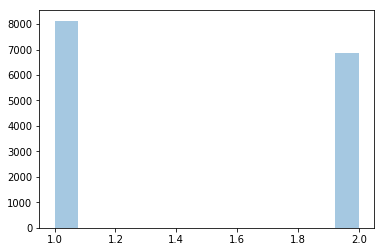

In [8]:
# data visualisation
# 1 dog / 2 cat

#dog_or_cat=train[:,:1]
print (train)
a=[]
i=0
b=0
c=0
for i in range (14992):
    a.append(int(train[i,:1]))
    if (int(train[i,:1]))==1:
        b=b+1
    else :
        c=c+1
print(b)
print(c)
print(a)
sns.distplot(a, kde=False)

In [10]:
first, second = train.shape

print (first, second) # how does the data look like ? (14993x24 matrix)
print (train[0,21], train[0,23]) # PetID and AdoptionSpeed for the first pet


14993 24
86e1089a3 2


In [32]:
def getLine(PetId, train):
    '''
    Get one line of data
    Input: PetId, train
    Output: (1, 24) array of values
    '''
    line = []
    dim1, dim2 = train.shape
    for i in range (dim1):
        if (train[i, 21] == PetId):
            line = train [i,:]        
    return line
#print(getLine('301e16ab9', train))


def getField(PetId, field, train):
    '''
    Input: what do you want
    Output: what you are looking for
    '''
    value = -1000
    if(field=='AdoptionSpeed'):
        value = getLine(PetId, train)[23]
    #...
    elif(field=='PhotoAmt'):
        value = getLine(PetId, train)[22]
        
    elif(field=='Type'):
        value = getLine(PetId, train)[0]
    #elif()
    #...
    else:
        pass
    return value
#print(getField('d24c30b4b', 'AdoptionSpeed', train))
#print(getField('d24c30b4b', 'PhotoAmt', train))


def getAdoptionSpeed(PetId, train):
    '''
    Input: PetId
    Output: AdoptionSpeed
    Need: train = pd.read_csv("train.csv").values first
    '''
    AdoptionSpeed = -1
    return getField(PetId, 'AdoptionSpeed', train)


def getType(PetId, train):
    '''
    Input: PetId
    Output: Type
    Need: train = pd.read_csv("train.csv").values first
    '''
    Type = -1
    return getField(PetId, 'Type', train)


def getPhotoAmt(PetId, train):
    '''
    Input: PetId, train
    Output: PhotoAmt
    '''
    PhotoAmt = -1
    return getField(PetId, 'PhotoAmt', train)

train = pd.read_csv("train.csv").values
#print(getPhotoAmt('d24c30b4b', train))


def moveFromList(PetId, output):
    '''
    input: one image_list, output dir
    move one picture for each animal to another folder
    '''
    os.rename(getImageList(PetId)[1], output + getImageList(PetId)[1][7:])
#moveFromList('5842f1ff5', 'data/train/')

In [60]:
# How many things in a folder

def how_many_items_in_folder(path):
    folder = glob.glob(path+os.sep+'*')
    i=0
    for files in folder:
        i+=1
    print(i)
    return 0
#how_many_items_in_folder('dataset/train/4/0')

In [17]:
def move_one_picture_per_pet():
    files = glob.glob('images/train_images/*-1.jpg')
    for file in files:
        head, tail = os.path.split(file)
        print(tail)
        output = ('dataset/train/')
        os.rename(file, output + tail)
        return 0
#move_one_picture_per_pet()

In [50]:
def move_by_AdoptionSpeed():
    files = glob.glob('dataset/train/*.jpg')
    for file in files:
        head, tail = os.path.split(file)
        #print(tail.find("-1.jpg"))
        PetID = tail[:tail.find("-1.jpg")]
        if getAdoptionSpeed(PetID, train)==0:
            output = ('dataset2/train/0/0/')
        elif getAdoptionSpeed(PetID, train)==1:
            output = ('dataset2/train/1/0/')
        elif getAdoptionSpeed(PetID, train)==2:
            output = ('dataset2/train/2/0/')
        elif getAdoptionSpeed(PetID, train)==3:
            output = ('dataset2/train/3/0/')
        else:
            output = ('dataset2/train/4/0/')
        os.rename(file, output + tail)
        #output = ('dataset/train/')
        #os.rename(file, output + tail)
    return 0

#move_by_AdoptionSpeed()

In [83]:
# create directories
for i in ['train', 'validation', 'test']:
    for j in range(0,5):
        os.makedirs('dataset'+os.sep+i+os.sep+str(j)+os.sep+str(0))
        
# os.makedirs('dataset/train/1/0')
# os.makedirs('dataset/train/2/0')
# os.makedirs('dataset/train/3/0')
# os.makedirs('dataset/train/4/0')

In [98]:
def move_train_valid_test():
    folders = glob.glob('tmp/*')
    for folder in folders:
        useless, adoptionSpeed = os.path.split(folder) # get adoptionSpeed
        #print(adoptionSpeed)
        files = glob.glob(folder+os.sep+'0'+os.sep+'*')
        n = len(files) # how many files for this adoptionSpeed
        
        tr = int(n*70.0/100.0)
        va = int(n*20.0/100.0)
        te = len(files) - tr - va # how many files in train(tr) / validation(va) / test(te)
        amount = [tr, va, te]
        print (amount)
        print (amount[0])
        #print(tr,va,te)
        
        destination = {
            "0": "dataset/train",
            "1": "dataset/validation",
            "2": "dataset/test"
        }
        for i in range(3):
            for j in range(amount[i]):
                files = glob.glob(folder+os.sep+'0'+os.sep+'*')
                file = random.choice(files)
                head, tail = os.path.split(file)
                dst = destination[str(i)]+os.sep+adoptionSpeed+os.sep+'0'+os.sep+tail
                os.rename(file, dst)

#move_train_valid_test()

In [29]:
# get one animal's pictures

def getImageList(number):
    '''
    input: one animal id
    output: image list for this animal
    '''
    image_list = []
    for filename in glob.glob('images/' + number + '*.jpg'): 
        image_list.append(filename) 
    return image_list
#print(getImageList("5842f1ff5")[1][7:])
print(getImageList("5842f1ff5"))
plt.show()

['images/5842f1ff5-4.jpg', 'images/5842f1ff5-1.jpg', 'images/5842f1ff5-6.jpg', 'images/5842f1ff5-7.jpg', 'images/5842f1ff5-5.jpg', 'images/5842f1ff5-8.jpg', 'images/5842f1ff5-2.jpg', 'images/5842f1ff5-3.jpg']


In [ ]:
# model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

In [ ]:
# model compile and fit

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)